##### Module imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.signal as signal
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##### Load Data

In [2]:
sports_df = pd.read_csv('athlete_events.csv')

In [3]:
noc = pd.read_csv('noc_regions.csv')

In [4]:
sports_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


##### Assessing Data 

In [6]:
# Check for null
sports_df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
sports_df.size

4066740

In [8]:
sports_df.shape

(271116, 15)

In [9]:
sports_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

##### Merging 'region' from noc_df with the main df and then further cleaning

In [10]:
# Merge 'noc' DataFrame with 'sports_df' on the 'NOC' column

sports_data = sports_df.merge(noc, on='NOC', how='left')

In [11]:
# Drop the 'ID' and 'notes' column from 'sports_df'
columns_to_drop = ['ID', 'notes']
sports_data.drop(columns_to_drop, axis=1, inplace=True)

In [12]:
sports_data.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark


In [13]:
# Rename the 'NOC' column to 'country_abbrv'
sports_data.rename(columns={'NOC': 'country_abbrv'}, inplace=True)

##### Handling mising Data and further cleaning

In [14]:
# fill the missing columns with the mean of each column

In [15]:
sports_df1 = sports_data.copy() 

In [16]:
sports_df1['Age'].fillna(sports_df1['Age'].mean(), inplace=True)
sports_df1['Height'].fillna(sports_df1['Height'].mean(), inplace=True)
sports_df1['Weight'].fillna(sports_df1['Weight'].mean(), inplace=True)

In [17]:
sports_df1.isna().sum()

Name                  0
Sex                   0
Age                   0
Height                0
Weight                0
Team                  0
country_abbrv         0
Games                 0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal            231333
region              370
dtype: int64

In [18]:
# turn age to integer
# height and weight, we can leave as float 

sports_df1['Age'] = sports_df1['Age'].astype(int)

In [19]:
# replace null value in 'medal' with 'No Medal'


sports_df1['Medal'].fillna('No Medal', inplace=True)

In [20]:
# Format the 'Height' and 'Weight' columns to two decimal points
sports_df1['Height'] = sports_df1['Height'].round(2)
sports_df1['Weight'] = sports_df1['Weight'].round(2)

In [21]:
sports_df1

,Name,Sex,Age,Height,Weight,Team,country_abbrv,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24,180.00,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,A Lamusi,M,23,170.00,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,Gunnar Nielsen Aaby,M,24,175.34,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark
3,Edgar Lindenau Aabye,M,34,175.34,70.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21,185.00,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29,179.00,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,Poland
271112,Piotr ya,M,27,176.00,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,Poland
271113,Piotr ya,M,27,176.00,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,Poland
271114,Tomasz Ireneusz ya,M,30,185.00,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,Poland


##### Outliers

In [22]:
#check for outliers

# Specify the columns to check for outliers
columns_to_check = [ 'Age', 'Height', 'Weight']

df_outliers = sports_df1[columns_to_check].describe()
print(df_outliers)

                 Age         Height         Weight
count  271116.000000  271116.000000  271116.000000
mean       25.537438     175.339198      70.701838
std         6.281690       9.278100      12.574690
min        10.000000     127.000000      25.000000
25%        22.000000     170.000000      63.000000
50%        25.000000     175.340000      70.700000
75%        28.000000     180.000000      75.000000
max        97.000000     226.000000     214.000000


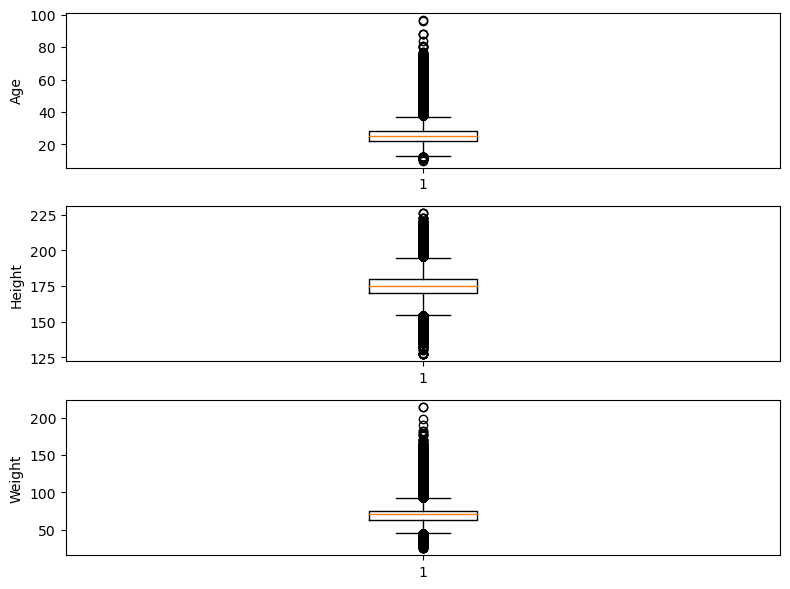

In [23]:
# Box plots
fig, axs = plt.subplots(len(columns_to_check), figsize=(8, 6))

for i, column in enumerate(columns_to_check):
    axs[i].boxplot(sports_df1[column])
    axs[i].set_ylabel(column)

plt.tight_layout()
plt.show()

In [24]:
# Calculate z-scores for 'Age', 'Height', and 'Weight' columns
z_scores = (sports_df1[['Age', 'Height', 'Weight']] - sports_df[['Age', 'Height', 'Weight']].mean()) / sports_df1[['Age', 'Height', 'Weight']].std()

# Define threshold for outlier removal
z_score_threshold = 3

# Remove rows with outliers based on z-scores
sports_df1 = sports_df1[(z_scores < z_score_threshold).all(axis=1)]

In [25]:
sports_df1.head()

,Name,Sex,Age,Height,Weight,Team,country_abbrv,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24,180.00,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,A Lamusi,M,23,170.00,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,Gunnar Nielsen Aaby,M,24,175.34,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark
3,Edgar Lindenau Aabye,M,34,175.34,70.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21,185.00,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


In [26]:
sports_df1.shape

(263100, 15)

In [27]:
sports_df1['Age']

0         24
1         23
2         24
3         34
4         21
          ..
271111    29
271112    27
271113    27
271114    30
271115    34
Name: Age, Length: 263100, dtype: int32

In [28]:
sports_df1.Event

0                      Basketball Men's Basketball
1                     Judo Men's Extra-Lightweight
2                          Football Men's Football
3                      Tug-Of-War Men's Tug-Of-War
4                 Speed Skating Women's 500 metres
                            ...                   
271111                  Luge Mixed (Men)'s Doubles
271112    Ski Jumping Men's Large Hill, Individual
271113          Ski Jumping Men's Large Hill, Team
271114                        Bobsleigh Men's Four
271115                        Bobsleigh Men's Four
Name: Event, Length: 263100, dtype: object

In [29]:
unique_events = sports_df1['Event'].unique()
#print(unique_events)

In [30]:
unique_sports = sports_df1['Sport'].unique()
print(unique_sports)

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Alpine Skiing' 'Handball' 'Wrestling'
 'Luge' 'Water Polo' 'Hockey' 'Rowing' 'Bobsleigh' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Weightlifting'
 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Figure Skating' 'Golf'
 'Softball' 'Archery' 'Volleyball' 'Synchronized Swimming' 'Table Tennis'
 'Nordic Combined' 'Baseball' 'Rhythmic Gymnastics' 'Freestyle Skiing'
 'Rugby Sevens' 'Trampolining' 'Beach Volleyball' 'Triathlon'
 'Art Competitions' 'Ski Jumping' 'Curling' 'Snowboarding' 'Rugby'
 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo' 'Cricket'
 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet' 'Jeu De Paume'
 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [31]:
sports_df1.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'country_abbrv',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

In [32]:
#To do..

# select the 5 oldest rows
# filter rows to sports of interest
# remove columns of interest
# feature engineering BMI
# scaling,encoding
# train test split
# feature = age, weight, height,BMI
# target = Medals
# regression model
# find accuracy, rmse, other netrics
# predict 

In [33]:
# Group the data by 'Sport' and find the minimum 'Year' within each group
oldest_sports = sports_df1.groupby('Sport')['Year'].min()

In [34]:
# Sort the oldest_sports Series in ascending order based on the 'Year' values
oldest_sports = oldest_sports.sort_values()

In [35]:
# Select the 5 oldest sports
oldest_sports = oldest_sports.head(5)

In [36]:
# Display the 5 oldest sports
print(oldest_sports)

Sport
Wrestling        1896
Weightlifting    1896
Athletics        1896
Gymnastics       1896
Tennis           1896
Name: Year, dtype: int64


In [37]:
selected_sports = ['Wrestling', 'Weightlifting', 'Athletics', 'Gymnastics', 'Tennis']

In [38]:
columns = ['Age', 'Height', 'Weight', 'Medal', 'Sport']

In [39]:
olympics_df = sports_df1[sports_df1['Sport'].isin(selected_sports)][columns]

In [40]:
olympics_df

,Age,Height,Weight,Medal,Sport
26,18,168.00,70.7,No Medal,Athletics
27,18,168.00,70.7,No Medal,Athletics
41,28,175.00,64.0,Bronze,Gymnastics
42,28,175.00,64.0,Gold,Gymnastics
43,28,175.00,64.0,No Medal,Gymnastics
...,...,...,...,...,...
271080,33,168.00,80.0,Bronze,Athletics
271099,36,171.00,63.0,No Medal,Wrestling
271100,26,175.34,70.7,No Medal,Athletics
271102,19,171.00,64.0,Bronze,Athletics


##### Feature Engineering

In [41]:
# Defining BMI(Body Mass Index)


olympics_df['BMI'] = olympics_df['Weight']/olympics_df['Height']

In [42]:
olympics_df

,Age,Height,Weight,Medal,Sport,BMI
26,18,168.00,70.7,No Medal,Athletics,0.420833
27,18,168.00,70.7,No Medal,Athletics,0.420833
41,28,175.00,64.0,Bronze,Gymnastics,0.365714
42,28,175.00,64.0,Gold,Gymnastics,0.365714
43,28,175.00,64.0,No Medal,Gymnastics,0.365714
...,...,...,...,...,...,...
271080,33,168.00,80.0,Bronze,Athletics,0.476190
271099,36,171.00,63.0,No Medal,Wrestling,0.368421
271100,26,175.34,70.7,No Medal,Athletics,0.403217
271102,19,171.00,64.0,Bronze,Athletics,0.374269


In [43]:
olympics_df_copy = olympics_df.copy()

##### train-test

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [45]:
# We need to encode our target

target_mapping = {'Gold': 1, 'Silver': 2, 'Bronze': 3, 'No Medal': 0}
olympics_df_copy['Medal'] = olympics_df_copy['Medal'].map(target_mapping)

In [46]:
olympics_df_copy

,Age,Height,Weight,Medal,Sport,BMI
26,18,168.00,70.7,0,Athletics,0.420833
27,18,168.00,70.7,0,Athletics,0.420833
41,28,175.00,64.0,3,Gymnastics,0.365714
42,28,175.00,64.0,1,Gymnastics,0.365714
43,28,175.00,64.0,0,Gymnastics,0.365714
...,...,...,...,...,...,...
271080,33,168.00,80.0,3,Athletics,0.476190
271099,36,171.00,63.0,0,Wrestling,0.368421
271100,26,175.34,70.7,0,Athletics,0.403217
271102,19,171.00,64.0,3,Athletics,0.374269


In [47]:
# Select the features (X) and target (y)
features = ['Age', 'Weight', 'Height', 'BMI']
target = 'Medal'

In [48]:
X = olympics_df_copy[features]
y = olympics_df_copy[target]

In [49]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [50]:
X_train

,Age,Weight,Height,BMI
228657,22,70.7,175.34,0.403217
440,22,63.0,167.00,0.377246
30800,42,70.7,175.34,0.403217
143308,22,85.0,175.00,0.485714
14716,21,75.0,189.00,0.396825
...,...,...,...,...
194184,26,70.0,180.00,0.388889
173917,24,58.0,155.00,0.374194
18935,27,63.0,173.00,0.364162
258028,22,73.0,178.00,0.410112


##### Modelling

In [51]:
# Random FOrest

model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Gradient Boost

model2 = GradientBoostingClassifier()
model2.fit(X_train, y_train)

GradientBoostingClassifier()

Now we make predictions on both and compare

In [53]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

In [54]:
# Evaluate the model's performance

accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy of Random Forest: {accuracy1*100:.2f}%')
print(f'Accuracy of GraientBoost: {accuracy2*100:.2f}%')

Accuracy of Random Forest: 87.80%
Accuracy of GraientBoost: 89.21%


We'll focus on GradientBoost

In [55]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred2)

In [56]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred2)

In [57]:
# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred2)

In [58]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.516093588417787


In [59]:
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.21904084798345397


In [60]:
print("R-squared:", r2)

R-squared: -0.10210405095045383


##### Prediction

In [61]:
#predicting medals based on events, using height,weight and age

In [62]:
reverse_mapping = {1: 'Gold', 2: 'Silver', 3: 'Bronze', 0: 'No Medal'}

In [63]:
# parameters to predict
# in order: Age, Weight, Height, BMI

param = [[22, 85, 175, 0.485714]] 

In [64]:
predicted_medal = model2.predict(param)

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [65]:
predicted_medal

array([0], dtype=int64)

In [66]:
predicted_medal_labels = [reverse_mapping[label] for label in predicted_medal]

In [67]:
# Print the predicted medal outcome labels
print('Predicted Medal:', predicted_medal_labels)

Predicted Medal: ['No Medal']


## ATTENTION

SOOOOOOOOOOO a small problem here, we have a biased model, its predicting 0 every time

In [68]:
y_train.value_counts()

0    55358
1     2232
2     2148
3     2147
Name: Medal, dtype: int64

see, here,, count of 0 compared to the others

trying to fix it  by 'Undersampling' the points, but that will drop us from 77k point to like 7k points which can lead to poor model quality

In [69]:
olympics_df_copy

,Age,Height,Weight,Medal,Sport,BMI
26,18,168.00,70.7,0,Athletics,0.420833
27,18,168.00,70.7,0,Athletics,0.420833
41,28,175.00,64.0,3,Gymnastics,0.365714
42,28,175.00,64.0,1,Gymnastics,0.365714
43,28,175.00,64.0,0,Gymnastics,0.365714
...,...,...,...,...,...,...
271080,33,168.00,80.0,3,Athletics,0.476190
271099,36,171.00,63.0,0,Wrestling,0.368421
271100,26,175.34,70.7,0,Athletics,0.403217
271102,19,171.00,64.0,3,Athletics,0.374269


In [70]:
#checkpoint
olympics2 = olympics_df_copy.copy()

In [71]:
# Group the data by 'Medal' column
grouped_df = olympics_df_copy.groupby('Medal')

In [72]:
# Determine the minimum number of instances across all medal classes
min_samples = grouped_df['Medal'].count().min()

# Undersample each medal class to have the same number of instances
undsamp_olympic__df = grouped_df.apply(lambda x: x.sample(n=min_samples, random_state=42))

#be sure to shuffle
undsamp_olympic__df = undsamp_olympic__df.sample(frac=1, random_state=42)

# Reset the index of the undersampled DataFrame
undsamp_olympic__df.reset_index(drop=True, inplace=True)

In [73]:
undsamp_olympic__df

,Age,Height,Weight,Medal,Sport,BMI
0,22,196.00,90.0,3,Athletics,0.459184
1,30,175.34,70.7,1,Wrestling,0.403217
2,19,163.00,59.0,3,Athletics,0.361963
3,22,186.00,70.0,3,Athletics,0.376344
4,22,186.00,74.0,2,Athletics,0.397849
...,...,...,...,...,...,...
10835,25,178.00,73.0,2,Athletics,0.410112
10836,23,175.34,70.7,1,Gymnastics,0.403217
10837,26,178.00,76.0,1,Athletics,0.426966
10838,19,163.00,59.0,0,Athletics,0.361963


In [74]:
undsamp_olympic__df.Medal.value_counts()

3    2710
1    2710
2    2710
0    2710
Name: Medal, dtype: int64

Equal dimension now

In [75]:
# Select the features (X) and target (y)
features = ['Age', 'Weight', 'Height', 'BMI']
target = 'Medal'

In [76]:
X = undsamp_olympic__df[features]
y = undsamp_olympic__df[target]

In [77]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [78]:
model3 = GradientBoostingClassifier()
model3.fit(X_train, y_train)

GradientBoostingClassifier()

In [79]:
y_pred3 = model3.predict(X_test)

In [80]:
accuracy3 = accuracy_score(y_test, y_pred3)
print(f'Accuracy of GraientBoost: {accuracy3*100:.2f}%')

Accuracy of GraientBoost: 27.26%


Just as i've thought.. Low quality

What do we do? <br/> Biased and wrong output model OR poor performance model